In [40]:
import pandas as pd
import numpy as np
import os
from functools import reduce
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir(r"C:\Users\Administrator.ZGC-20130623RFQ\Desktop")

In [4]:
vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

C:\Users\Administrator.ZGC-20130623RFQ\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
column_names=vehicles.columns.values
column_names[[70,71,72,73,74,76,79]]#查看红色部分警告的包含混合数据类型的列名

array(['fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr',
       'c240bDscr', 'startStop'], dtype=object)

In [6]:
len(vehicles)

39207

In [7]:
len(vehicles.columns)#可见vehicles是一个39207*83的dataframe

83

In [8]:
print(vehicles.columns)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [9]:
len(pd.unique(vehicles.year))#dataset包含35年份的数据

35

In [10]:
min(vehicles.year)

1984

In [11]:
max(vehicles['year'])

2018

In [12]:
pd.value_counts(vehicles.fuelType1)#汽车使用的主要燃料类型

Regular Gasoline     26977
Premium Gasoline     10846
Diesel                1092
Electricity            142
Midgrade Gasoline       90
Natural Gas             60
Name: fuelType1, dtype: int64

In [13]:
pd.value_counts(vehicles.trany)#汽车的变速箱种类

Automatic 4-spd                     11045
Manual 5-spd                         8338
Automatic 3-spd                      3151
Automatic (S6)                       2874
Manual 6-spd                         2580
Automatic 5-spd                      2198
Automatic 6-spd                      1524
Manual 4-spd                         1483
Automatic (S8)                       1197
Automatic (S5)                        830
Automatic (variable gear ratios)      738
Automatic 7-spd                       695
Automatic (AM-S7)                     334
Automatic 8-spd                       324
Automatic (S7)                        294
Automatic (S4)                        233
Automatic (AM7)                       195
Automatic (AV-S6)                     174
Automatic 9-spd                       170
Automatic (A1)                        134
Automatic (AM6)                       122
Automatic (AM-S6)                     109
Automatic (AV-S7)                      99
Manual 7-spd                      

In [14]:
vehicles['trany2']=vehicles.trany.str[0]
pd.value_counts(vehicles.trany2)#A-自动挡，M-手动挡

A    26608
M    12588
Name: trany2, dtype: int64

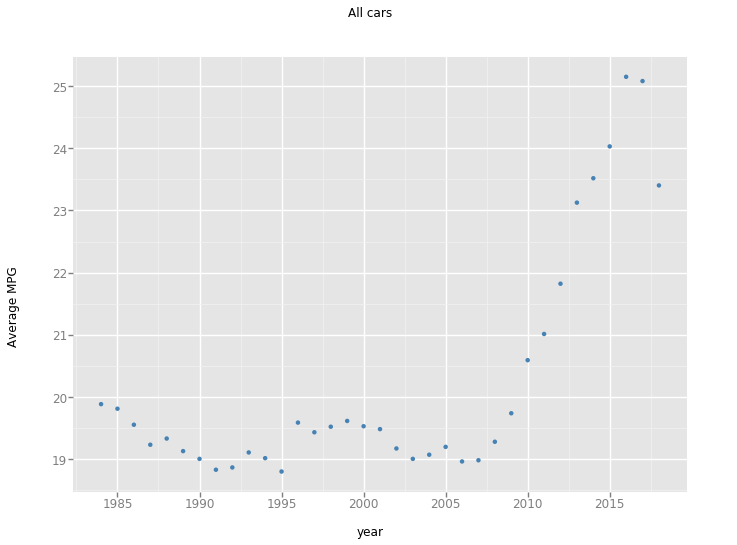

<ggplot: (-9223371870988327897)>

In [15]:
#分析油耗随时间变化趋势
#平均每加仑里程数随时间变化的总体趋势
grouped=vehicles.groupby('year')
averaged=grouped['comb08','highway08','city08'].agg([np.mean])
averaged.columns=['comb08_mean','highway08_mean','city08_mean']
averaged['year']=averaged.index
ggplot(averaged,aes('year','comb08_mean'))+geom_point(color='steelblue')+xlab('year')+ylab('Average MPG')+ggtitle('All cars')

In [16]:
#可以看到油耗近年来的显著上升，据此推测：
#1、油耗严重的混合动力汽车最近变得很流行
#   去除混合动力汽车
criterial1=vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])#选择fuelType1为普通、优质、降解的行
criterial2=vehicles.fuelType2.isnull()#选择fuelType2为null
criterial3=vehicles.atvType!='Hybrid'#保证atvType不是混合动力
vehicles_non_hybrid=vehicles[criterial1&criterial2&criterial3]

In [17]:
len(vehicles_non_hybrid)

35914

In [18]:
grouped=vehicles_non_hybrid.groupby(['year'])
averaged=grouped['comb08'].agg(np.mean)
print(averaged)

year
1984    19.121622
1985    19.394686
1986    19.320457
1987    19.164568
1988    19.367607
1989    19.141964
1990    19.031459
1991    18.838060
1992    18.861566
1993    19.137383
1994    19.092632
1995    18.872591
1996    19.530962
1997    19.368000
1998    19.329545
1999    19.239759
2000    19.169345
2001    19.075058
2002    18.950270
2003    18.761711
2004    18.967339
2005    19.005510
2006    18.786398
2007    18.987512
2008    19.191781
2009    19.738095
2010    20.466736
2011    20.838219
2012    21.407328
2013    22.228877
2014    22.279835
2015    22.418539
2016    22.742509
2017    22.812613
2018    22.934758
Name: comb08, dtype: float64


In [19]:
#2、近年来是否大引擎的汽车越来越少
pd.unique(vehicles_non_hybrid.displ)#displ:按升计的引擎排量

array([ 2. ,  4.9,  2.2,  5.2,  1.8,  1.6,  2.3,  2.8,  4. ,  5. ,  3.3,
        3.1,  3.8,  4.6,  3.4,  3. ,  5.9,  2.5,  4.5,  6.8,  2.4,  2.9,
        5.7,  4.3,  3.5,  5.8,  3.2,  4.2,  1.9,  2.6,  7.4,  3.9,  1.5,
        1.3,  4.1,  8. ,  6. ,  3.6,  5.4,  5.6,  1. ,  2.1,  1.2,  6.5,
        2.7,  4.7,  5.5,  1.1,  5.3,  4.4,  3.7,  6.7,  4.8,  1.7,  6.2,
        8.3,  1.4,  6.1,  7. ,  8.4,  6.3,  nan,  6.6,  6.4,  0.9])

In [20]:
#去掉空值
criterial=vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid=vehicles_non_hybrid[criterial]
vehicles_non_hybrid.displ=vehicles_non_hybrid.displ.astype('float')#以防万一，统一数据类型

C:\Users\Administrator.ZGC-20130623RFQ\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:
criterial=vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid=vehicles_non_hybrid[criterial]
vehicles_non_hybrid.comb08=vehicles_non_hybrid.comb08.astype('float')

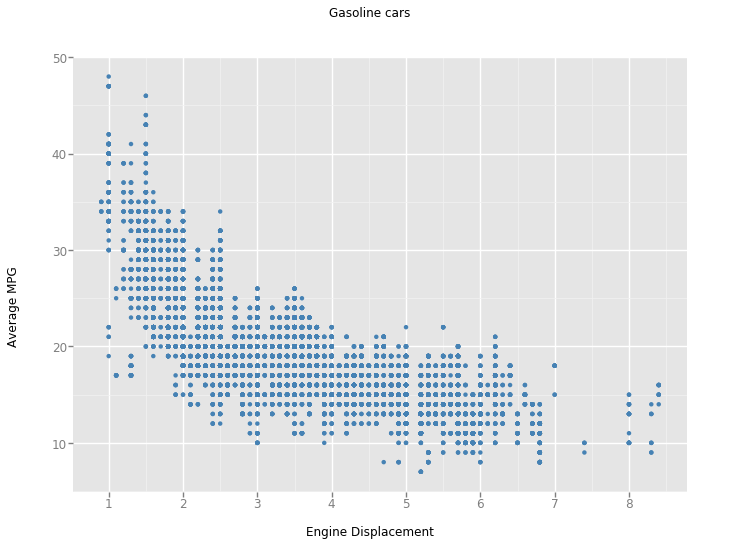

<ggplot: (-9223371870988252377)>

In [22]:
ggplot(vehicles_non_hybrid,aes('displ','comb08'))+geom_point(color='steelblue')+xlab('Engine Displacement')+ylab('Average MPG')+ggtitle('Gasoline cars')

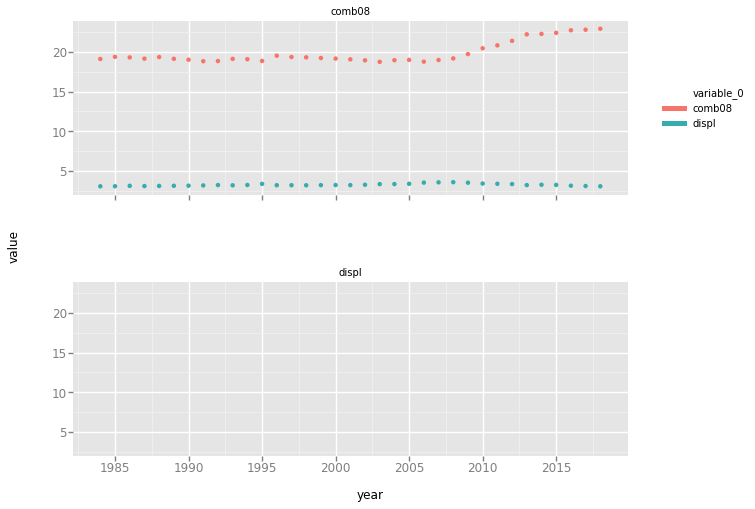

<ggplot: (165866678711)>

In [24]:
#上图显示油耗经济型和引擎排量之间的负相关性
#3、是否大引擎的汽车近年来制造得更少了
grouped_by_year=vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year=grouped_by_year['displ','comb08'].agg([np.mean])
avg_grouped_by_year['year']=avg_grouped_by_year.index
melt_avg_grouped_by_year=pd.melt(avg_grouped_by_year,id_vars='year')#改造avg_grouped_by_year的datafrme，将它从宽的格式转化为长的格式
p=ggplot(aes(x='year',y='value',color='variable_0'),data=melt_avg_grouped_by_year)
p+geom_point()+facet_wrap("variable_0")

In [25]:
for name,group in grouped_by_year:
    print(name)
    print(group)

1984
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
18215  15.695714         0.0        0.0        0.0      18      0.0        0   
18216  14.982273         0.0        0.0        0.0      20      0.0        0   
18217  21.974000         0.0        0.0        0.0      13      0.0        0   
18218  21.974000         0.0        0.0        0.0      13      0.0        0   
18219  19.388824         0.0        0.0        0.0      15      0.0        0   
18220  18.311667         0.0        0.0        0.0      16      0.0        0   
18221  18.311667         0.0        0.0        0.0      16      0.0        0   
18222  16.480500         0.0        0.0        0.0      18      0.0        0   
18223  14.330870         0.0        0.0        0.0      21      0.0        0   
18225  13.733750         0.0        0.0        0.0      21      0.0        0   
18226  13.733750         0.0        0.0        0.0      21      0.0        0   
18227   8.039268         0.0       

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
14     25.354615         0.0        0.0        0.0      12      0.0        0   
25     25.354615         0.0        0.0        0.0      11      0.0        0   
36     25.354615         0.0        0.0        0.0      11      0.0        0   
47     32.961000         0.0        0.0        0.0       9      0.0        0   
58     32.961000         0.0        0.0        0.0      10      0.0        0   
69     32.961000         0.0        0.0        0.0      10      0.0        0   
80     32.961000         0.0        0.0        0.0       9      0.0        0   
91     25.354615         0.0        0.0 

1987
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
20737  36.623333         0.0        0.0        0.0       8      0.0        0   
20738  36.623333         0.0        0.0        0.0       8      0.0        0   
20739  36.623333         0.0        0.0        0.0       8      0.0        0   
20741  18.311667         0.0        0.0        0.0      15      0.0        0   
20742  18.311667         0.0        0.0        0.0      15      0.0        0   
20743  16.480500         0.0        0.0        0.0      18      0.0        0   
20744  15.695714         0.0        0.0        0.0      18      0.0        0   
20745  14.982273         0.0        0.0        0.0      20      0.0        0   
20746  16.480500         0.0        0.0        0.0      18      0.0        0   
20747  16.480500         0.0        0.0        0.0      19      0.0        0   
20748  15.695714         0.0        0.0        0.0      18      0.0        0   
20749  19.388824         0.0       

[1099 rows x 84 columns]
1989
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
20765  19.388824         0.0        0.0        0.0      15      0.0        0   
20766  20.600625         0.0        0.0        0.0      15      0.0        0   
20767  19.388824         0.0        0.0        0.0      15      0.0        0   
33919  15.695714         0.0        0.0        0.0      19      0.0        0   
33921  14.982273         0.0        0.0        0.0      20      0.0        0   
33922  16.480500         0.0        0.0        0.0      17      0.0        0   
33923  20.600625         0.0        0.0        0.0      14      0.0        0   
33924  18.311667         0.0        0.0        0.0      15      0.0        0   
33925  18.311667         0.0        0.0        0.0      15      0.0        0   
33926  18.311667         0.0        0.0        0.0      15      0.0        0   
33927  18.311667         0.0        0.0        0.0      15      0.0        0   
33928  18.

1991
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
20794  25.354615         0.0        0.0        0.0      11      0.0        0   
20795  25.354615         0.0        0.0        0.0      11      0.0        0   
20796  20.600625         0.0        0.0        0.0      15      0.0        0   
20797  20.600625         0.0        0.0        0.0      15      0.0        0   
20798  20.600625         0.0        0.0        0.0      15      0.0        0   
20799  20.600625         0.0        0.0        0.0      15      0.0        0   
20800  23.543571         0.0        0.0        0.0      13      0.0        0   
20801  25.354615         0.0        0.0        0.0      11      0.0        0   
20802  25.354615         0.0        0.0        0.0      11      0.0        0   
20803  25.354615         0.0        0.0        0.0      11      0.0        0   
20806  21.974000         0.0        0.0        0.0      14      0.0        0   
20807  25.354615         0.0       

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
20818  20.600625         0.0        0.0        0.0      13      0.0        0   
20819  23.543571         0.0        0.0        0.0      11      0.0        0   
20820  19.388824         0.0        0.0        0.0      15      0.0        0   
20821  21.974000         0.0        0.0        0.0      14      0.0        0   
20822  21.974000         0.0        0.0        0.0      14      0.0        0   
20823  29.964545         0.0        0.0        0.0       9      0.0        0   
20824  29.964545         0.0        0.0        0.0       9      0.0        0   
20825  14.330870         0.0        0.0        0.0      21      0.0        0   
20826  14.982273         0.0        0.0        0.0      19      0.0        0   
20828  17.347895         0.0        0.0        0.0      16      0.0        0   
20829  17.347895         0.0        0.0        0.0      16      0.0        0   
20830  17.347895         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
688    18.311667         0.0        0.0        0.0      16      0.0        0   
689    17.347895         0.0        0.0        0.0      17      0.0        0   
690    14.982273         0.0        0.0        0.0      19      0.0        0   
692    18.311667         0.0        0.0        0.0      15      0.0        0   
693    18.311667         0.0        0.0        0.0      15      0.0        0   
694    18.311667         0.0        0.0        0.0      15      0.0        0   
695    18.311667         0.0        0.0        0.0      16      0.0        0   
696    18.311667         0.0        0.0        0.0      16      0.0        0   
697    18.311667         0.0        0.0        0.0      16      0.0        0   
698    18.311667         0.0        0.0        0.0      16      0.0        0   
699    21.974000         0.0        0.0        0.0      12      0.0        0   
700    23.543571         0.0        0.0 

1996
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
2788   18.311667         0.0        0.0        0.0      16      0.0        0   
2789   18.311667         0.0        0.0        0.0      16      0.0        0   
2790   14.330870         0.0        0.0        0.0      20      0.0        0   
2792   14.330870         0.0        0.0        0.0      20      0.0        0   
2793   18.311667         0.0        0.0        0.0      15      0.0        0   
2794   18.311667         0.0        0.0        0.0      15      0.0        0   
2795   18.311667         0.0        0.0        0.0      16      0.0        0   
2796   18.311667         0.0        0.0        0.0      16      0.0        0   
2797   17.347895         0.0        0.0        0.0      17      0.0        0   
2798   18.311667         0.0        0.0        0.0      16      0.0        0   
2799   23.543571         0.0        0.0        0.0      11      0.0        0   
2800   29.964545         0.0       

1998
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
4427   18.311667         0.0        0.0        0.0      16      0.0        0   
4428   18.311667         0.0        0.0        0.0      16      0.0        0   
4429   21.974000         0.0        0.0        0.0      13      0.0        0   
4430   21.974000         0.0        0.0        0.0      12      0.0        0   
4431   21.974000         0.0        0.0        0.0      13      0.0        0   
4432   21.974000         0.0        0.0        0.0      12      0.0        0   
4434   15.695714         0.0        0.0        0.0      18      0.0        0   
4435   14.330870         0.0        0.0        0.0      20      0.0        0   
4436   13.733750         0.0        0.0        0.0      20      0.0        0   
4437   18.311667         0.0        0.0        0.0      16      0.0        0   
4438   17.347895         0.0        0.0        0.0      17      0.0        0   
4439   18.311667         0.0       

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
6210   18.311667         0.0        0.0        0.0      15      0.0        0   
6212   18.311667         0.0        0.0        0.0      15      0.0        0   
6213   17.347895         0.0        0.0        0.0      17      0.0        0   
6214   17.347895         0.0        0.0        0.0      17      0.0        0   
6215   17.347895         0.0        0.0        0.0      17      0.0        0   
6216   17.347895         0.0        0.0        0.0      17      0.0        0   
6217   16.480500         0.0        0.0        0.0      17      0.0        0   
6218   17.347895         0.0        0.0        0.0      17      0.0        0   
6219   17.347895         0.0        0.0        0.0      17      0.0        0   
6220   21.974000         0.0        0.0        0.0      12      0.0        0   
6221   18.311667         0.0        0.0        0.0      15      0.0        0   
6224   17.347895         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
7140   18.311667         0.0        0.0        0.0      15      0.0        0   
7141   18.311667         0.0        0.0        0.0      15      0.0        0   
7142   14.982273         0.0        0.0        0.0      19      0.0        0   
7143   15.695714         0.0        0.0        0.0      18      0.0        0   
7144   18.311667         0.0        0.0        0.0      15      0.0        0   
7146   18.311667         0.0        0.0        0.0      15      0.0        0   
7147   15.695714         0.0        0.0        0.0      19      0.0        0   
7148   16.480500         0.0        0.0        0.0      17      0.0        0   
7149   16.480500         0.0        0.0        0.0      17      0.0        0   
7150   16.480500         0.0        0.0        0.0      18      0.0        0   
7151   15.695714         0.0        0.0        0.0      19      0.0        0   
7152   17.347895         0.0        0.0 

2003
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
9214   18.311667         0.0        0.0        0.0      15      0.0        0   
9215   18.311667         0.0        0.0        0.0      15      0.0        0   
9216   21.974000         0.0        0.0        0.0      13      0.0        0   
9217   15.695714         0.0        0.0        0.0      18      0.0        0   
9218   15.695714         0.0        0.0        0.0      18      0.0        0   
9219   15.695714         0.0        0.0        0.0      18      0.0        0   
9220   15.695714         0.0        0.0        0.0      18      0.0        0   
9221   16.480500         0.0        0.0        0.0      18      0.0        0   
9224   15.695714         0.0        0.0        0.0      18      0.0        0   
9225   21.974000         0.0        0.0        0.0      12      0.0        0   
9226   17.347895         0.0        0.0        0.0      16      0.0        0   
9227   16.480500         0.0       

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
10370  18.311667         0.0        0.0        0.0      16      0.0        0   
10371  18.311667         0.0        0.0        0.0      16      0.0        0   
10372  15.695714         0.0        0.0        0.0      18      0.0        0   
10373  15.695714         0.0        0.0        0.0      18      0.0        0   
10374  15.695714         0.0        0.0        0.0      19      0.0        0   
10375  15.695714         0.0        0.0        0.0      18      0.0        0   
10376  15.695714         0.0        0.0        0.0      18      0.0        0   
10377  15.695714         0.0        0.0        0.0      18      0.0        0   
10379  15.695714         0.0        0.0        0.0      18      0.0        0   
10380  16.480500         0.0        0.0        0.0      17      0.0        0   
10381  15.695714         0.0        0.0        0.0      18      0.0        0   
10382  18.311667         0.0        0.0 

2006
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
12904  15.695714         0.0        0.0        0.0      18      0.0        0   
12905  15.695714         0.0        0.0        0.0      18      0.0        0   
12906  17.347895         0.0        0.0        0.0      17      0.0        0   
12907  18.311667         0.0        0.0        0.0      15      0.0        0   
12908  17.347895         0.0        0.0        0.0      16      0.0        0   
12910  17.347895         0.0        0.0        0.0      15      0.0        0   
12911  18.311667         0.0        0.0        0.0      15      0.0        0   
12912  15.695714         0.0        0.0        0.0      19      0.0        0   
12913  18.311667         0.0        0.0        0.0      15      0.0        0   
12914  18.311667         0.0        0.0        0.0      15      0.0        0   
12915  15.695714         0.0        0.0        0.0      19      0.0        0   
12916  18.311667         0.0       

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
14109  32.961000         0.0        0.0        0.0       8      0.0        0   
14110  29.964545         0.0        0.0        0.0       9      0.0        0   
14111  23.543571         0.0        0.0        0.0      12      0.0        0   
14112  20.600625         0.0        0.0        0.0      13      0.0        0   
14113  23.543571         0.0        0.0        0.0      11      0.0        0   
14114  23.543571         0.0        0.0        0.0      11      0.0        0   
14116  17.347895         0.0        0.0        0.0      16      0.0        0   
14117  17.347895         0.0        0.0        0.0      16      0.0        0   
14118  14.982273         0.0        0.0        0.0      19      0.0        0   
14119  14.982273         0.0        0.0        0.0      19      0.0        0   
14120  18.311667         0.0        0.0        0.0      16      0.0        0   
14121  17.347895         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
15387  13.184400         0.0        0.0        0.0      22      0.0        0   
15388  17.347895         0.0        0.0        0.0      17      0.0        0   
15389  16.480500         0.0        0.0        0.0      18      0.0        0   
15390  17.347895         0.0        0.0        0.0      16      0.0        0   
15391  17.347895         0.0        0.0        0.0      16      0.0        0   
15392  18.311667         0.0        0.0        0.0      15      0.0        0   
15393  18.311667         0.0        0.0        0.0      15      0.0        0   
15394  14.982273         0.0        0.0        0.0      19      0.0        0   
15398  14.982273         0.0        0.0        0.0      19      0.0        0   
15399  17.347895         0.0        0.0        0.0      16      0.0        0   
15400  17.347895         0.0        0.0        0.0      16      0.0        0   
15401  12.677308         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
16708  25.354615         0.0        0.0        0.0      11      0.0        0   
16709  13.733750         0.0        0.0        0.0      21      0.0        0   
16712  18.311667         0.0        0.0        0.0      15      0.0        0   
16713  17.347895         0.0        0.0        0.0      16      0.0        0   
16714  20.600625         0.0        0.0        0.0      13      0.0        0   
16715  23.543571         0.0        0.0        0.0      11      0.0        0   
16716  23.543571         0.0        0.0        0.0      12      0.0        0   
16717  23.543571         0.0        0.0        0.0      11      0.0        0   
16718  16.480500         0.0        0.0        0.0      17      0.0        0   
16719  15.695714         0.0        0.0        0.0      19      0.0        0   
16720  15.695714         0.0        0.0        0.0      18      0.0        0   
16721  15.695714         0.0        0.0 

[962 rows x 84 columns]
2011
       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
21937  14.982273         0.0        0.0        0.0      19  18.5040        0   
21938  14.982273         0.0        0.0        0.0      18  18.4821        0   
21939  15.695714         0.0        0.0        0.0      19  18.5595        0   
21940  17.347895         0.0        0.0        0.0      17  16.8405        0   
21941  17.347895         0.0        0.0        0.0      17  16.8405        0   
21943  19.388824         0.0        0.0        0.0      14  13.9000        0   
21944  23.543571         0.0        0.0        0.0      12  11.9689        0   
21945  23.543571         0.0        0.0        0.0      12  11.6566        0   
21946  20.600625         0.0        0.0        0.0      14  13.7000        0   
21948  17.347895         0.0        0.0        0.0      16  15.9017        0   
21949  19.388824         0.0        0.0        0.0      15  14.9508        0   
21950  18.3

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
24387  17.347895         0.0        0.0        0.0      16  16.4596        0   
24388  13.184400         0.0        0.0        0.0      22  21.8706        0   
24389  15.695714         0.0        0.0        0.0      17  17.4935        0   
24390  16.480500         0.0        0.0        0.0      17  16.9415        0   
24392  14.330870         0.0        0.0        0.0      19  19.4325        0   
24394  15.695714         0.0        0.0        0.0      19  18.5752        0   
24395  12.207778         0.0        0.0        0.0      25  25.3116        0   
24396  17.347895         0.0        0.0        0.0      16  15.9536        0   
24397  18.311667         0.0        0.0        0.0      16  15.9368        0   
24398  15.695714         0.0        0.0        0.0      17  17.4460        0   
24399  13.733750         0.0        0.0        0.0      21  20.6741        0   
24400  17.347895         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
25705  11.365862         0.0        0.0        0.0      25  25.0677        0   
25708  10.987000         0.0        0.0        0.0      26  26.1074        0   
25709  12.207778         0.0        0.0        0.0      25  24.5074        0   
25710  11.365862         0.0        0.0        0.0      26  25.9637        0   
25711  11.771786         0.0        0.0        0.0      26  26.2719        0   
25712  12.677308         0.0        0.0        0.0      24  23.8717        0   
25713  12.207778         0.0        0.0        0.0      25  25.2729        0   
25714  14.982273         0.0        0.0        0.0      19  18.5595        0   
25715  14.330870         0.0        0.0        0.0      19  19.2053        0   
25716  18.311667         0.0        0.0        0.0      15  15.1851        0   
25717  16.480500         0.0        0.0        0.0      18  17.7061        0   
25719  13.733750         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
28525  10.987000         0.0        0.0        0.0      26  26.1507        0   
28526  10.300313         0.0        0.0        0.0      28  27.5618        0   
28527  11.365862         0.0        0.0        0.0      25  24.9709        0   
28528  15.695714         0.0        0.0        0.0      18  17.8210        0   
28529  14.330870         0.0        0.0        0.0      20  20.0796        0   
28530  13.733750         0.0        0.0        0.0      21  21.1067        0   
28531  16.480500         0.0        0.0        0.0      18  17.7119        0   
28532  11.365862         0.0        0.0        0.0      26  25.9637        0   
28533  11.365862         0.0        0.0        0.0      26  26.2706        0   
28535  15.695714         0.0        0.0        0.0      19  19.1743        0   
28536  14.982273         0.0        0.0        0.0      21  20.5296        0   
28537  17.347895         0.0        0.0 

       barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
31344  11.771786         0.0        0.0        0.0      26  25.6879        0   
31345  12.677308         0.0        0.0        0.0      24  23.9827        0   
31365  12.207778         0.0        0.0        0.0      24  23.5383        0   
31366  12.207778         0.0        0.0        0.0      24  23.6875        0   
31367  12.207778         0.0        0.0        0.0      24  23.5383        0   
31368  12.207778         0.0        0.0        0.0      24  23.6875        0   
31369  14.330870         0.0        0.0        0.0      21  20.5209        0   
31370  15.695714         0.0        0.0        0.0      18  18.3385        0   
31371  12.207778         0.0        0.0        0.0      24  23.5383        0   
31372  16.480500         0.0        0.0        0.0      18  17.5243        0   
31373  14.982273         0.0        0.0        0.0      19  18.7066        0   
31374  13.184400         0.0        0.0 

In [29]:
#调查汽车的制造商和型号
#1、观察汽车的品牌和型号如何影响油耗随时间变化的趋势
#1.1 四缸引擎汽车在美国市场出现各品牌和型号的频次
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [30]:
vehicles_non_hybrid.cylinders=vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [31]:
vehicles_non_hybrid_4=vehicles_non_hybrid[(vehicles_non_hybrid.cylinders==4.0)]

Axes(0.125,0.125;0.775x0.755)


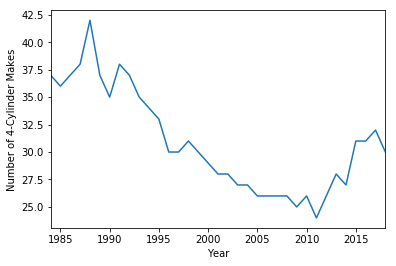

In [36]:
grouped_by_year_4_cylinder=vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig=grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print(fig)

In [41]:
#上图可知，1985年以来，四缸引擎汽车的品牌数量呈下降趋势
#然而我们并不知道汽车品牌总数是否在同期发生变化
#所以接下来观察每年的汽车品牌数
#首先看看各年有四缸引擎汽车的品牌列表
grouped_by_year_4_cylinder=vehicles_non_hybrid_4.groupby(['year'])

unique_makes=[]
for name,group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
    
unique_makes=reduce(set.intersection,unique_makes)
print(unique_makes)#在此期间只有10家制造商每年都制造四缸引擎汽车

{'Honda', 'Mazda', 'Jeep', 'Chevrolet', 'Subaru', 'Dodge', 'Volkswagen', 'Nissan', 'Ford', 'Toyota'}


In [42]:
#接着来看这些这些汽车生产商的型号随时间的油耗表现
boolean_mask=[]#将在10家制造商set中的每行的boolean加到boolean_mask中
for index,row in vehicles_non_hybrid_4.iterrows():
    make=row['make']
    boolean_mask.append(make in unique_makes)

df_common_makes=vehicles_non_hybrid_4[boolean_mask]

In [43]:
#按year和make分组,计算各组的均值
df_common_makes_grouped=df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

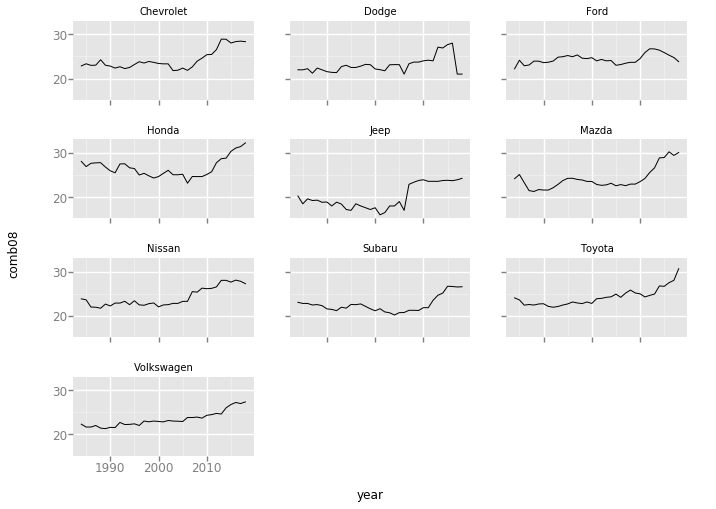

<ggplot: (-9223371870976906720)>

In [44]:
ggplot(aes(x='year',y='comb08'),data=df_common_makes_grouped)+geom_line()+facet_wrap('make')